<a href="https://colab.research.google.com/github/feniltailor22/Time-Series-Analysis/blob/main/Forecasting_Car_Sales_Data_using_AR%2C_ARMA%2C_and_ARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/sales-cars.csv')

In [3]:
df.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [4]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [5]:
df.head()

,Month,Sales
0,2016-01-01,266
1,2016-02-01,146
2,2016-03-01,183
3,2016-04-01,119
4,2016-05-01,180


In [6]:
df.set_index('Month',inplace=True)

In [7]:
df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [8]:
df.tail()

,Sales
Month,
2018-08-01,408
2018-09-01,490
2018-10-01,420
2018-11-01,520
2018-12-01,480


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


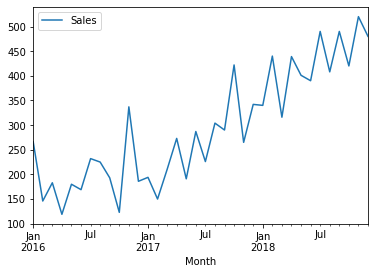

In [10]:
df.plot()

In [11]:
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
adf_test=adfuller(df['Sales'])

In [13]:
print(f'p-value: {adf_test[1]}')

p-value: 0.9979641164504948


For ADF Test:

The p-value is not less than the significance level (say 0.05) in order to reject the null hypothesis. 

Here p-value is >0.05 iferring that we failed to reject the Null Hypothesis.

Thereby, inferring that the series is non-stationary means it has some time dependency.


In [14]:
kpss_test=kpss(df['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


In [15]:
print(f'p-value: {kpss_test[1]}')

p-value: 0.0621776915426302


For KPSS Test:

The p-value is not less than the significance level (say 0.05) in order to reject the null hypothesis. 

Here p-value is >0.05 iferring that we failed to reject the Null Hypothesis.

Thereby, inferring that the series is stationary means it has no time dependency.


Now, we came to case scenario that ADF Test indicates that Data is Non-stationary. Whereas, KPSS Test indicates that data is stationary.

Moreover, the AutoCorrelation Function plot also indicates that the data follows trend and seasonality. 

Hence, we can conclude that this data is trend stationary. 

We can detrend this data by applying differencing and by applying model fitting.

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

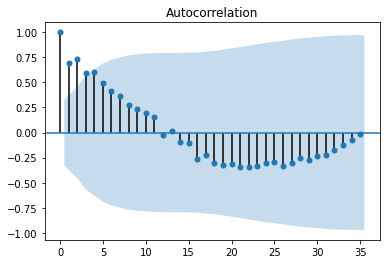

In [17]:
acf_plot= plot_acf(df, lags=35)

In [18]:
#Based on decaying ACF, we are dealing with an AutoRegressive Model.

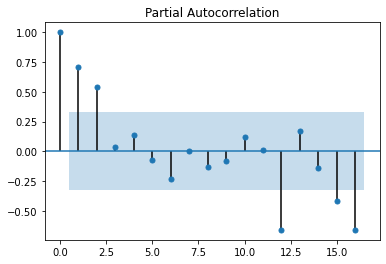

In [19]:
pacf_plot= plot_pacf(df)

In [20]:
#Based on PACF, we should start with an AR Model with lags 1,2, and 3. (not considering 2,3,15,16 lags just to leep the model simple initially)

In [34]:
df_train= df[:27] # 27 data as train data
df_test = df[26:]  # 9 data as test data

In [158]:
df_train

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180
2016-06-01,169
2016-07-01,232
2016-08-01,225
2016-09-01,193


In [37]:
df_test

,Sales
Month,
2018-03-01,316
2018-04-01,439
2018-05-01,401
2018-06-01,390
2018-07-01,490
2018-08-01,408
2018-09-01,490
2018-10-01,420
2018-11-01,520


In [38]:
df_test.size

10

**Autoreggresive AR Model**

In [39]:
from statsmodels.tsa.ar_model import AR

In [40]:
model_ar= AR(df_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [41]:
model_ar_fit= model_ar.fit()

In [42]:
df_test['pred_ar']= model_ar_fit.predict(start=26, end=35, dynamic= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_test

,Sales,pred_ar
Month,,
2018-03-01,316,348.464701
2018-04-01,439,392.133309
2018-05-01,401,377.952621
2018-06-01,390,433.349208
2018-07-01,490,404.456656
2018-08-01,408,437.282179
2018-09-01,490,413.262318
2018-10-01,420,441.616941
2018-11-01,520,435.481090


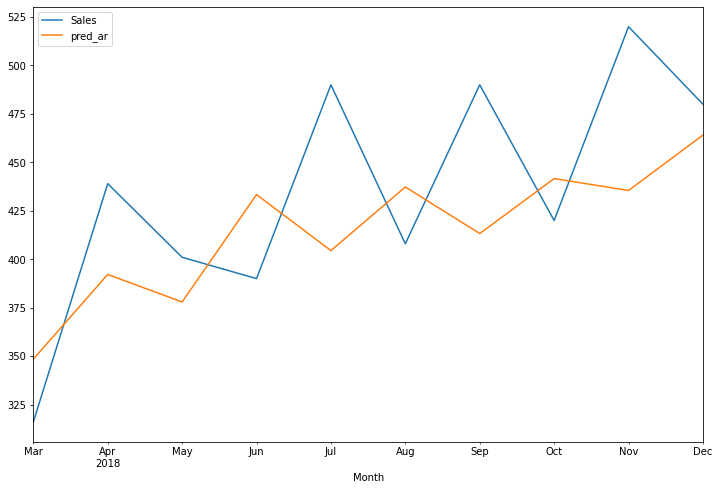

In [44]:
df_test[['Sales','pred_ar']].plot(figsize=(12,8))

In [124]:
from sklearn import metrics

In [306]:
MAE_ar= metrics.mean_absolute_error(df_test['Sales'],df_test['pred_ar'])
print('MAE:' + str (MAE_ar))

MAE:45.93646782099762


In [307]:
MAPE_ar= metrics.mean_absolute_percentage_error(df_test['Sales'],df_test['pred_ar'])
print('MAPE:' + str (MAPE_ar))

MAPE:0.10282853197173299


In [308]:
MSE_ar= metrics.mean_squared_error(df_test['Sales'],df_test['pred_ar'])
print('MSE:' + str (MSE_ar))

MSE:2758.9307269297187


In [309]:
print('RMSE:', np.sqrt(MSE_ar))

RMSE: 52.52552452788757


**ARMA model**

In [45]:
from statsmodels.tsa.arima_model import ARMA

In [130]:
model_arma= ARMA(df_train,order=(4,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [131]:
model_arma_fit= model_arma.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [132]:
model_arma_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   27
Model:                     ARMA(4, 1)   Log Likelihood                -154.040
Method:                       css-mle   S.D. of innovations             59.922
Date:                Sun, 30 Jan 2022   AIC                            322.080
Time:                        05:07:12   BIC                            331.151
Sample:                    01-01-2016   HQIC                           324.777
                         - 03-01-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6001.5583        nan        nan        nan         nan         nan
ar.L1.Sales     0.1998        nan        nan        nan         nan         nan
ar.L2.Sales     0.3570        nan        nan        nan         nan         nan
ar.L3.Sales     0.0052      0.000     48.997      0.000       0.005       0.005
ar.L4.Sales     0.4379        nan        nan        nan         nan         nan
ma.L1.Sales    -0.0277      0.190     -0.146      0.886      -0.400       0.344
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           -0.0000j            1.0000           -0.0000
AR.2           -1.1499           -0.0000j            1.1499           -0.5000
AR.3            0.0690           -1.4075j            1.4092           -0.2422
AR.4            0.0690           +1.4075j            1.4092            0.2422
MA.1           36.1323           +0.0000j           36.1323            0.0000
-----------------------------------------------------------------------------
"""

In [133]:
df_test['pred_arma']= model_arma_fit.predict(start=26, end=35, dynamic= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
df_test

,Sales,pred_ar,pred_arma
Month,,,
2018-03-01,316,348.464701,325.456145
2018-04-01,439,392.133309,373.779565
2018-05-01,401,377.952621,342.189851
2018-06-01,390,433.349208,396.324168
2018-07-01,490,404.456656,345.952335
2018-08-01,408,437.282179,376.211398
2018-09-01,490,413.262318,350.723334
2018-10-01,420,441.616941,379.877234
2018-11-01,520,435.481090,354.701501


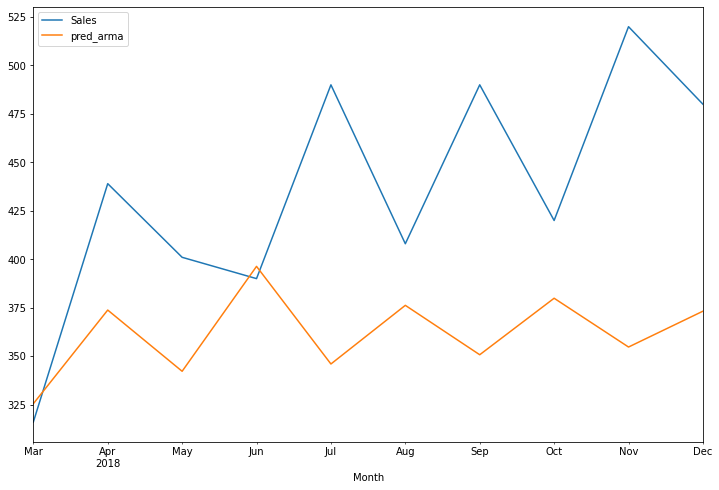

In [204]:
df_test[['Sales','pred_arma']].plot(figsize=(12,8))

In [298]:
MAE_pred_arma= metrics.mean_absolute_error(df_test['Sales'],df_test['pred_arma'])
print('MAE:' + str (MAE_pred_arma))

MAE:76.71475174483172


In [299]:
MAPE_pred_arma= metrics.mean_absolute_percentage_error(df_test['Sales'],df_test['pred_arma'])
print('MAPE:' + str (MAPE_pred_arma))

MAPE:0.16334082933409308


In [300]:
MSE_pred_arma= metrics.mean_squared_error(df_test['Sales'],df_test['pred_arma'])
print('MSE:' + str (MSE_pred_arma))

MSE:8934.017479975208


In [301]:
print('RMSE:', np.sqrt(MSE_pred_arma))

RMSE: 94.5199316545204


In [143]:
df_train

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180
2016-06-01,169
2016-07-01,232
2016-08-01,225
2016-09-01,193


In [144]:
df.shift(1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


In [147]:
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model
df_diff= df.diff(periods=1).dropna()

In [148]:
df_diff

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0
2016-10-01,-70.0


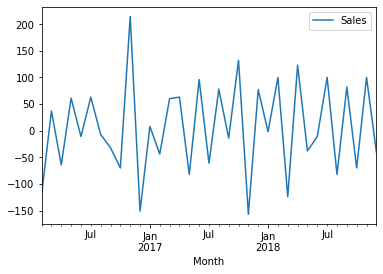

In [149]:
df_diff.plot()

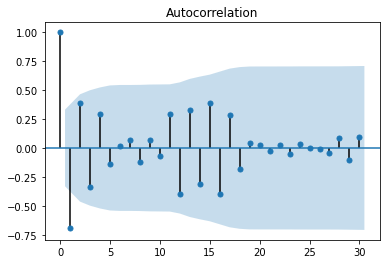

In [207]:
acf_plot_diff= plot_acf(df_diff, lags=30)

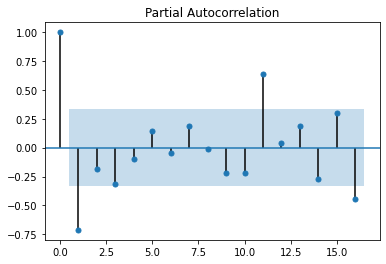

In [151]:
pacf_plot_diff= plot_pacf(df_diff)

In [152]:
df_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2016-02-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   35 non-null     float64
dtypes: float64(1)
memory usage: 560.0 bytes


In [186]:
df_diff_train= df_diff[:26] # 26 data as train data
df_diff_test = df_diff[26:]  # 9 data as test data

In [187]:
df_diff_train

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0
2016-10-01,-70.0


In [188]:
df_diff_test

,Sales
Month,
2018-04-01,123.0
2018-05-01,-38.0
2018-06-01,-11.0
2018-07-01,100.0
2018-08-01,-82.0
2018-09-01,82.0
2018-10-01,-70.0
2018-11-01,100.0
2018-12-01,-40.0


In [247]:
model_diff_arma= ARMA(df_diff_train,order=(7,2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [248]:
model_diff_arma_fit= model_diff_arma.fit()

In [249]:
model_diff_arma_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   26
Model:                     ARMA(7, 2)   Log Likelihood                -137.019
Method:                       css-mle   S.D. of innovations             39.173
Date:                Sun, 30 Jan 2022   AIC                            296.037
Time:                        06:30:02   BIC                            309.876
Sample:                    02-01-2016   HQIC                           300.023
                         - 03-01-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.3371      3.675      1.997      0.063       0.135      14.539
ar.L1.Sales    -0.8694      0.250     -3.476      0.003      -1.360      -0.379
ar.L2.Sales    -1.1446      0.357     -3.202      0.006      -1.845      -0.444
ar.L3.Sales    -1.1111      0.437     -2.544      0.022      -1.967      -0.255
ar.L4.Sales    -0.2256      0.485     -0.465      0.648      -1.177       0.726
ar.L5.Sales    -0.0577      0.403     -0.143      0.888      -0.848       0.732
ar.L6.Sales     0.3168      0.290      1.092      0.291      -0.252       0.886
ar.L7.Sales     0.4240      0.188      2.250      0.039       0.055       0.793
ma.L1.Sales    -0.2890      0.310     -0.931      0.365      -0.897       0.319
ma.L2.Sales     1.0000      0.204      4.895      0.000       0.600       1.400
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4788           -0.0000j            1.4788           -0.0000
AR.2            0.2661           -0.9701j            1.0059           -0.2074
AR.3            0.2661           +0.9701j            1.0059            0.2074
AR.4           -0.2389           -1.0421j            1.0691           -0.2859
AR.5           -0.2389           +1.0421j            1.0691            0.2859
AR.6           -1.1402           -0.2810j            1.1743           -0.4615
AR.7           -1.1402           +0.2810j            1.1743            0.4615
MA.1            0.1445           -0.9895j            1.0000           -0.2269
MA.2            0.1445           +0.9895j            1.0000            0.2269
-----------------------------------------------------------------------------
"""

In [250]:
df_test['pred_diff_arma']= model_diff_arma_fit.predict(start=26, end=35, dynamic= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [251]:
df_test

,Sales,pred_ar,pred_arma,pred_diff_arma
Month,,,,
2018-03-01,316,348.464701,325.456145,NaN
2018-04-01,439,392.133309,373.779565,49.373306
2018-05-01,401,377.952621,342.189851,-7.197433
2018-06-01,390,433.349208,396.324168,49.823424
2018-07-01,490,404.456656,345.952335,-8.818058
2018-08-01,408,437.282179,376.211398,12.399110
2018-09-01,490,413.262318,350.723334,-27.248273
2018-10-01,420,441.616941,379.877234,-1.550690
2018-11-01,520,435.481090,354.701501,63.434194


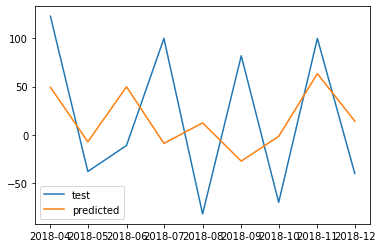

In [252]:
plt.plot(df_diff_test, label='test')
plt.plot(df_test['pred_diff_arma'], label='predicted')
plt.legend()

In [287]:
MAE_pred_diff_arma= metrics.mean_absolute_error(df_diff_test['Sales'],df_test['pred_diff_arma'].dropna())
print('MAE:' + str (MAE_pred_diff_arma))

MAE:70.77679763131022


In [288]:
MAPE_pred_diff_arma= metrics.mean_absolute_percentage_error(df_diff_test['Sales'],df_test['pred_diff_arma'].dropna())
print('MAPE:' + str (MAPE_pred_diff_arma))

MAPE:1.467802894604072


In [304]:
MSE_pred_diff_arma= metrics.mean_squared_error(df_diff_test['Sales'],df_test['pred_diff_arma'].dropna())
print('MSE:' + str (MSE_pred_diff_arma))

MSE:5747.023770282857


In [305]:
print('RMSE:', np.sqrt(MSE_pred_diff_arma))

RMSE: 75.8091272228012


**ARIMA model**

Three values are given as an input to ARIMA model:

* p: AutoRegressive model lags 
* d: differencing (Integrated)
* q: Moving Average lags

In [253]:
from statsmodels.tsa.arima_model import ARIMA

In [258]:
model_arima= ARIMA(df_train, order=(7,2,0))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [259]:
model_arima_fit= model_arima.fit()

In [260]:
df_test['pred_arima']= model_arima_fit.forecast(steps=10)[0]
df_test['pred_arima']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Month
2018-03-01    418.424414
2018-04-01    379.179658
2018-05-01    441.102585
2018-06-01    400.641208
2018-07-01    473.050990
2018-08-01    439.055929
2018-09-01    473.730774
2018-10-01    472.209602
2018-11-01    522.252651
2018-12-01    506.142344
Name: pred_arima, dtype: float64

In [261]:
df_test

,Sales,pred_ar,pred_arma,pred_diff_arma,pred_arima
Month,,,,,
2018-03-01,316,348.464701,325.456145,NaN,418.424414
2018-04-01,439,392.133309,373.779565,49.373306,379.179658
2018-05-01,401,377.952621,342.189851,-7.197433,441.102585
2018-06-01,390,433.349208,396.324168,49.823424,400.641208
2018-07-01,490,404.456656,345.952335,-8.818058,473.050990
2018-08-01,408,437.282179,376.211398,12.399110,439.055929
2018-09-01,490,413.262318,350.723334,-27.248273,473.730774
2018-10-01,420,441.616941,379.877234,-1.550690,472.209602
2018-11-01,520,435.481090,354.701501,63.434194,522.252651


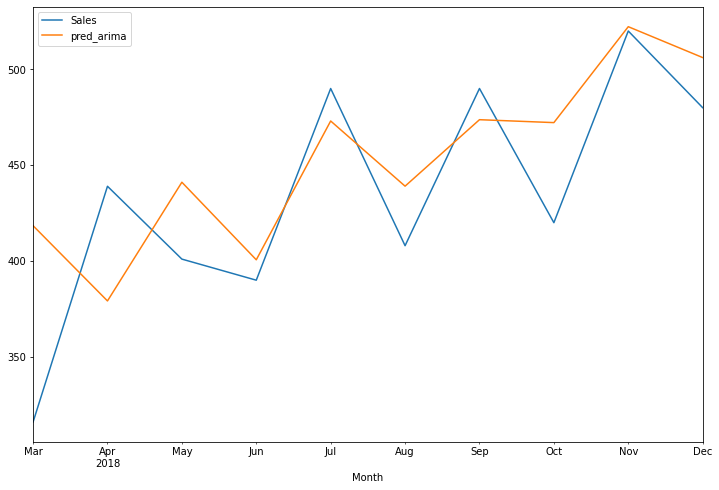

In [262]:
df_test[['Sales','pred_arima']].plot(figsize=(12,8))

In [292]:
MAE_pred_arima= metrics.mean_absolute_error(df_test['Sales'],df_test['pred_arima'])
print('MAE:' + str (MAE_pred_arima))

MAE:35.786731197159725


In [293]:
MAPE_pred_arima= metrics.mean_absolute_percentage_error(df_test['Sales'],df_test['pred_arima'])
print('MAPE:' + str (MAPE_pred_arima))

MAPE:0.09146981114433708


In [294]:
MSE_pred_arima= metrics.mean_squared_error(df_test['Sales'],df_test['pred_arima'])
print('MSE:' + str (MSE_pred_arima))

MSE:2072.1453136779455


In [295]:
print('RMSE:', np.sqrt(MSE_pred_arima))

RMSE: 45.520822858093695


In [296]:
print(model_arima_fit.aic)

295.84164016272507
